In [12]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['^GSPC','COMP','GC=F','CL=F','^IRX'] #S&P500(^GSPC) Nasdaq(COMP) gold(GC=F) oil(CL=F) bonds(^IRX)symbol
from datetime import datetime
startdate = datetime(2017,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate).dropna() 
print(data['Close'])



[*********************100%***********************]  5 of 5 completed
                 CL=F       COMP         GC=F        ^GSPC   ^IRX
Date                                                             
2021-04-01  61.450001  20.150000  1726.500000  4019.870117  0.008
2021-04-05  58.650002  18.590000  1727.000000  4077.909912  0.015
2021-04-06  59.330002  18.700001  1741.500000  4073.939941  0.015
2021-04-07  59.770000  17.200001  1740.099976  4079.949951  0.010
2021-04-08  59.599998  16.809999  1756.800049  4097.169922  0.005
...               ...        ...          ...          ...    ...
2023-07-31  81.800003   4.190000  1970.500000  4588.959961  5.248
2023-08-01  81.370003   4.140000  1940.699951  4576.729980  5.260
2023-08-02  79.489998   4.140000  1937.400024  4513.390137  5.260
2023-08-03  81.550003   4.350000  1932.000000  4501.890137  5.258
2023-08-04  82.639999   4.060000  1978.199951  4478.029785  5.253

[590 rows x 5 columns]


[*********************100%***********************]  5 of 5 completed
                  AAPL        AMZN         IBM         WMT         XOM
Date                                                                  
2017-01-03   29.037500   37.683498  159.837479   68.660004   90.889999
2017-01-04   29.004999   37.859001  161.816437   69.059998   89.889999
2017-01-05   29.152500   39.022499  161.281067   69.209999   88.550003
2017-01-06   29.477501   39.799500  162.074570   68.260002   88.500000
2017-01-09   29.747499   39.846001  160.277252   68.709999   87.040001
...                ...         ...         ...         ...         ...
2023-07-31  196.449997  133.679993  144.179993  159.860001  107.239998
2023-08-01  195.610001  131.690002  143.330002  159.110001  106.620003
2023-08-02  192.580002  128.210007  144.169998  159.220001  105.290001
2023-08-03  191.169998  128.910004  144.449997  159.259995  107.120003
2023-08-04  181.990005  139.570007  144.240005  158.339996  107.419998

[1658 r

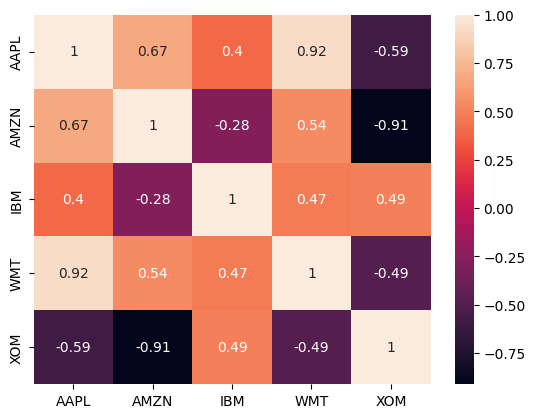

In [15]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['AAPL','AMZN','IBM','WMT','XOM'] #Apple, Amazon, IBM, Walmart, ExxonMobil symbol
from datetime import datetime
startdate = datetime(2017,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate).dropna() 
print(data['Close'])

#Calculate year-end prices here
annual_prices = data['Close'].resample('A').last()
#Calculate annual returns here
annual_returns = annual_prices.pct_change()
#Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)
#Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

In [6]:
import pandas as pd
listings = pd.read_excel('listings.xlsx', sheet_name='nyse',na_values='n/a')
#Inspect listings
print(listings.info())
#Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)
#Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)
#Select companies with IPO Year before 2019
listings = listings[listings['IPO Year']< 2019]
#Inspect the new listings data
print(listings.info())
#Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               10 non-null     object 
 1   Stock Symbol           10 non-null     object 
 2   Company Name           10 non-null     object 
 3   Last Sale              10 non-null     float64
 4   Market Capitalization  10 non-null     float64
 5   IPO Year               10 non-null     int64  
 6   Sector                 10 non-null     object 
 7   Industry               10 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 772.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, FAX to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               4 non-null      object 
 1   Company Name           4 non-null      object 


In [8]:
import pandas as pd
listings = pd.read_excel('listings.xlsx', sheet_name='nyse',na_values='n/a')

#Move 'stock symbol' into the index
listings.set_index('Stock Symbol', inplace=True)
#Drop rows with missing 'sector' data
listings.dropna(subset=['Sector'], inplace=True)
#Select companies with IPO Year before 2019
listings = listings[listings['IPO Year']< 2019]
#Inspect the new listings data
print(listings.info())
#Show the number of companies per sector
print(listings.groupby('Sector').size().sort_values(ascending=True))
#Select the largest company for each sector
components = listings.groupby(['Sector'])['Market Capitalization'].nlargest(1)
#Print components, sorted by market cap
print(components.sort_values(ascending=False))
#Select stock symbols and print the result
tickers = components.index.get_level_values('Stock Symbol')
print(tickers)
#Print company name, market cap, and last price for each component
info_cols = ['Company Name', 'Market Capitalization','Last Sale']
print(listings.loc[tickers, info_cols].sort_values('Market Capitalization', ascending=False))

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, FAX to ZTO
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Exchange               4 non-null      object 
 1   Company Name           4 non-null      object 
 2   Last Sale              4 non-null      float64
 3   Market Capitalization  4 non-null      float64
 4   IPO Year               4 non-null      int64  
 5   Sector                 4 non-null      object 
 6   Industry               4 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 256.0+ bytes
None
Sector
Consumer Services    1
Health Care          1
Nan                  1
Transportation       1
dtype: int64
Sector             Stock Symbol
Health Care        ZTS             26105.443
Transportation     ZTO              9237.663
Nan                FAX              1266.333
Consumer Services  ZOES              332.556
Name: Market Capitalization, dtype: f

Import index component price info, calculate returns of each company

[*********************100%***********************]  4 of 4 completed
                  AAPL        AMZN       GOOGL       RBLX
Date                                                     
2021-03-10  119.980003  152.882004  101.809502  69.500000
2021-03-11  121.959999  155.679504  105.027000  73.900002
2021-03-12  121.029999  154.474503  102.500000  69.699997
2021-03-15  123.989998  154.084000  102.722000  72.150002
2021-03-16  125.570000  154.593002  104.194504  77.000000
...                ...         ...         ...        ...
2023-08-01  195.610001  131.690002  131.550003  39.430000
2023-08-02  192.580002  128.210007  128.380005  37.630001
2023-08-03  191.169998  128.910004  128.449997  36.680000
2023-08-04  181.990005  139.570007  128.110001  37.480000
2023-08-07  178.850006  142.220001  131.529999  37.599998

[607 rows x 4 columns]


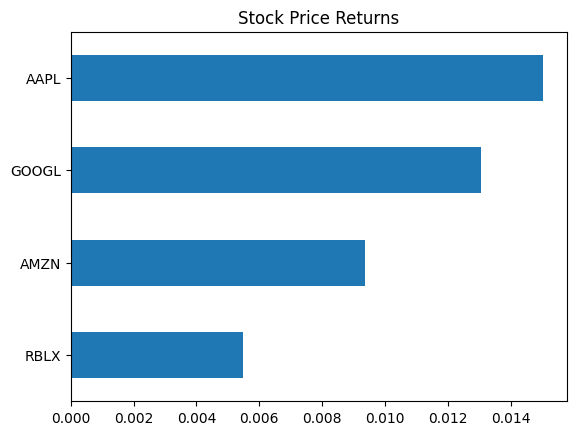

In [31]:
import pandas a                                                                                                                                                                     s pd
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['AAPL','AMZN','RBLX','GOOGL'] #Apple, Amazon, IBM, Walmart, ExxonMobil symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate).dropna() 
#Print tickers
print(data['Close'])
#Import prices and inspect result
#Calculate the returns
price_return = data['Close'].iloc[-1].div(data['Close'].iloc[0].sub(1).mul(100))
#Plot horizontal bar chart of sorted price_return
price_return.sort_values().plot(kind='barh', title = 'Stock Price Returns')
plt.show()


Calculate number of shares outstanding

In [34]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['XXII', 'FAX', 'IAF', 'ABE', 'ZBK', 'ZOES', 'ZTS', 'ZTO']
listings = pd.read_excel('listings.xlsx', sheet_name='nyse',na_values='n/a')

# Inspect listings and print tickers
print(listings.info())
print(tickers)

# Select components and relevant columns from listings
components = listings.loc[tickers, ['Market Capitalization', 'Last Sale']]

# Print the first rows of components
print(components.head())

# Calculate the number of shares here
no_shares = components['Market Capitalization'].div(components['Last Sale'])

# Print the sorted no_shares
print(no_shares.sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             10 non-null     object 
 1   Exchange               10 non-null     object 
 2   Stock Symbol           10 non-null     object 
 3   Company Name           10 non-null     object 
 4   Last Sale              10 non-null     float64
 5   Market Capitalization  10 non-null     float64
 6   IPO Year               10 non-null     int64  
 7   Sector                 10 non-null     object 
 8   Industry               10 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 848.0+ bytes
None
['XXII', 'FAX', 'IAF', 'ABE', 'ZBK', 'ZOES', 'ZTS', 'ZTO']


KeyError: "None of [Index(['XXII', 'FAX', 'IAF', 'ABE', 'ZBK', 'ZOES', 'ZTS', 'ZTO'], dtype='object')] are in the [index]"

[*********************100%***********************]  4 of 4 completed
                  AAPL        AMZN       GOOGL       RBLX
Date                                                     
2021-03-10  119.980003  152.882004  101.809502  69.500000
2021-03-11  121.959999  155.679504  105.027000  73.900002
2021-03-12  121.029999  154.474503  102.500000  69.699997
2021-03-15  123.989998  154.084000  102.722000  72.150002
2021-03-16  125.570000  154.593002  104.194504  77.000000
...                ...         ...         ...        ...
2023-08-03  191.169998  128.910004  128.449997  36.680000
2023-08-04  181.990005  139.570007  128.110001  37.480000
2023-08-07  178.850006  142.220001  131.529999  37.599998
2023-08-08  179.800003  139.940002  131.399994  37.740002
2023-08-09  178.190002  137.850006  129.660004  29.459999

[609 rows x 4 columns]


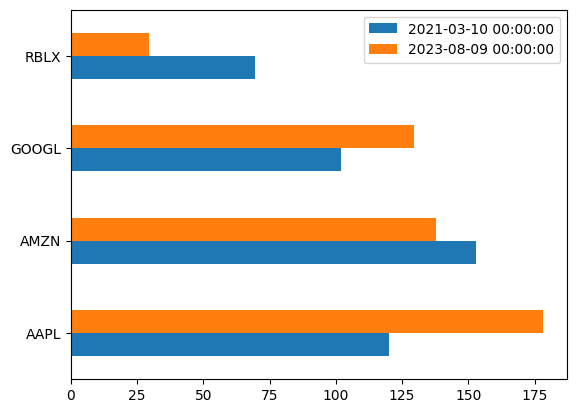

In [15]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['AAPL','AMZN','RBLX','GOOGL'] #Apple, Amazon, IBM, Walmart, ExxonMobil symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate).dropna() 
#Print tickers
print(data['Close'])
#Import prices and inspect result
# Select components and relevant columns from listings
#components = data.loc[tickers, ['Market Capitalization', 'Last Sale']]
# Select the number of shares
#no_shares = components['Number of Shares']
#print(no_shares.sort_values())
# Create the series of market cap per ticker
market_cap = data['Close']

# Select first and last market cap here
first_value = market_cap.iloc[0]
last_value = market_cap.iloc[-1]

# Concatenate and plot first and last market cap here
pd.concat([first_value, last_value], axis=1).plot(kind='barh')
plt.show()


In [27]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['AAPL'] #Apple, Amazon, IBM, Walmart, ExxonMobil symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate).dropna() 

market_cap_series = data['Close']
#print(market_cap_series)
# Aggregate and print the market cap per trading day
#raw_index = market_cap_series.sum(axis=0)
raw_index = market_cap_series.mean()


# Normalize the aggregate market cap here 

#print(index)

# Plot the index here
raw_index.plot(title='Market-Cap Weighted Index')
plt.show()


[*********************100%***********************]  1 of 1 completed


AttributeError: 'numpy.float64' object has no attribute 'plot'

Evaluate Index Performance

[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Percentage Change Index'}, xlabel='Date'>

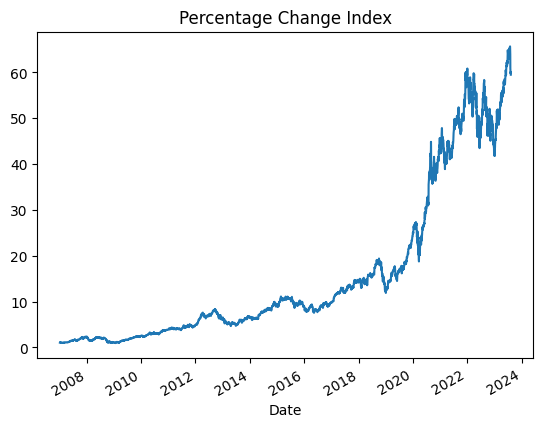

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#solve string problem
yf.pdr_override()
#starting setup 
tickers = ['AAPL'] #Apple, Amazon, IBM, Walmart, ExxonMobil symbol
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
data= pdr.get_data_yahoo(tickers,start=startdate, end=enddate)

market_cap_series = data['Close'].pct_change()

agg_market_cap = market_cap_series.add(1)

index = agg_market_cap.cumprod();

index.plot(title='Percentage Change Index')